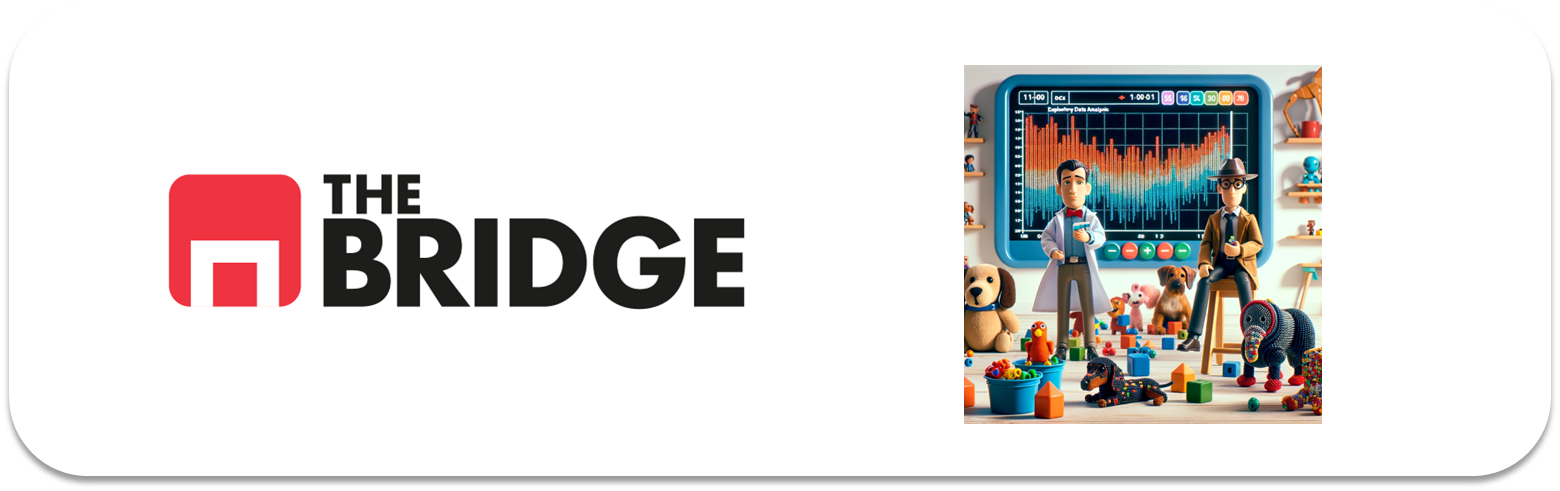

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [63]:
from bootcampviztools import plot_categorical_numerical_relationship, \
    plot_combined_graphs, \
    pinta_distribucion_categoricas, \
    plot_grouped_boxplots, \
    plot_categorical_relationship_fin, \
    plot_grouped_histograms, \
    grafico_dispersion_con_correlacion, \
    bubble_plot

In [64]:
def cardinalidad(df_in, umbral_categorica, umbral_continua):
    # DataFrame para almacenar los resultados
    resultados = pd.DataFrame(columns=['Cardinalidad', '%_card', 'Clasificación'])
    
    # Número total de filas en el DataFrame
    num_filas = len(df_in)
    
    for col in df_in.columns:
        # Calcular la cardinalidad
        cardinalidad = df_in[col].nunique()
        
        # Calcular el porcentaje de valores diferentes
        porcentaje = cardinalidad / num_filas * 100
        
        # Determinar la clasificación de la columna
        if cardinalidad == 2:
            clasificacion = 'Binaria'
        elif cardinalidad < umbral_categorica:
            clasificacion = 'Categórica'
        else: 
            if porcentaje == 100:
                clasificacion = 'Indice'
            elif porcentaje >= umbral_continua:
                clasificacion = 'Numérica Continua'
            else:
                clasificacion = 'Numérica Discreta'
        
        # Añadir los resultados al DataFrame
        resultados.loc[col] = [cardinalidad, porcentaje, clasificacion]
    
    return resultados

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [65]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [66]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [67]:
df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"], inplace=True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [68]:
df_titanic['family_members'] = df_titanic['parch'] + df_titanic['sibsp']

df_titanic.drop(columns=["parch", "sibsp"], inplace=True)

In [69]:
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [70]:
embark_town_mode = df_titanic['embark_town'].mode()[0]

embark_town_nan = df_titanic.embark_town.isna()

df_titanic.loc[embark_town_nan, 'embark_town'] = embark_town_mode

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [71]:
es_woman = df_titanic.who == "woman"
es_child = df_titanic.who == "man"
es_man = df_titanic.who == "child"

media_woman = df_titanic.loc[es_woman, 'age'].mean()
media_man = df_titanic.loc[es_man, 'age'].mean()
media_child = df_titanic.loc[es_child, 'age'].mean()

es_age_nan = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nan, 'age'] = media_woman
df_titanic.loc[es_man & es_age_nan, 'age'] = media_man
df_titanic.loc[es_child & es_age_nan, 'age'] = media_child

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

In [72]:
cardinalidad(df_titanic, 10, 30)

,Cardinalidad,%_card,Clasificación
sex,2,0.224467,Binaria
age,89,9.988777,Numérica Discreta
fare,248,27.833895,Numérica Discreta
class,3,0.336700,Categórica
who,3,0.336700,Categórica
adult_male,2,0.224467,Binaria
embark_town,3,0.336700,Categórica
alive,2,0.224467,Binaria
alone,2,0.224467,Binaria
family_members,9,1.010101,Categórica


In [73]:
col_categoricas = ['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'family_members']

col_numericas = ['age', 'fare']

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic? ¿Y entre ser adulto o ser niño?

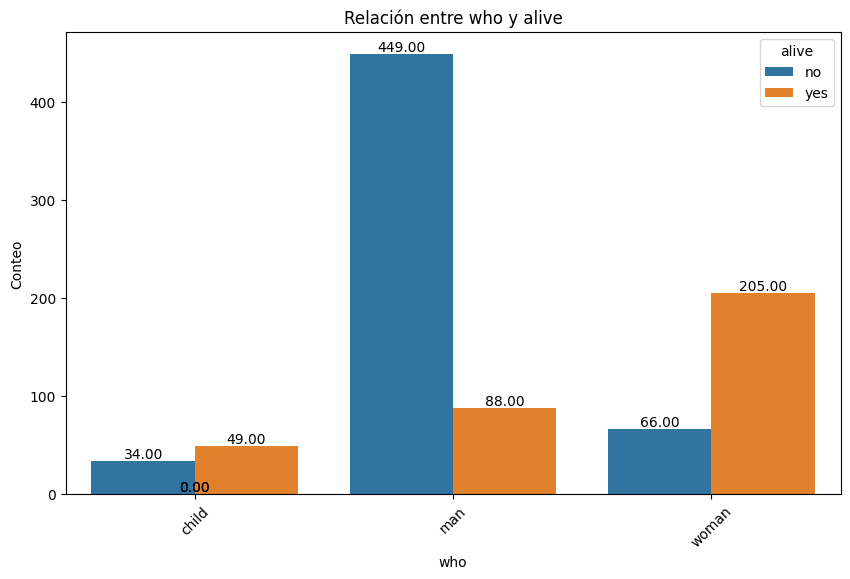

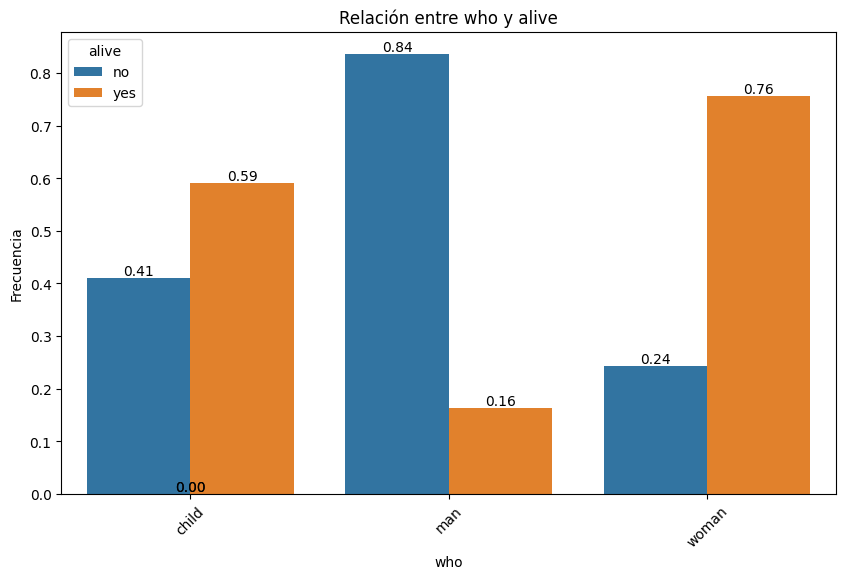

In [74]:
#En términos absolutos y relativos ¿sobrevivieron más hombres, mujeres o niños?
plot_categorical_relationship_fin(df_titanic, 'who','alive', relative_freq=False, show_values=True, size_group = 5)
plot_categorical_relationship_fin(df_titanic, 'who','alive', relative_freq=True, show_values=True, size_group = 5)

In [75]:
#¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?

#1: Tabla de contingencia
tabla_contingencia_sex = pd.crosstab(df_titanic['sex'], df_titanic['alive'])
tabla_contingencia_sex


#2: Test Chi Cuadrado
from scipy.stats import chi2_contingency

chi2_sex, p_sex, dof_sex, expected_sex = chi2_contingency(tabla_contingencia_sex)

print("Valor Chi-Cuadrado:", chi2_sex)
print("P-Value:", p_sex)
print("Grados de Libertad:", dof_sex)
print("Tabla de Frecuencias Esperadas:\n", expected_sex)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.197357062775565e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


#### Existe significación estadística entre el sexo y la supervivencia porque `P-Value: 1.197357062775565e-58`

In [76]:
 #¿Y entre ser adulto o ser niño y la supervivencia?

#Primero creo las columnas 'ischild' y 'is_adult'
df_titanic['is_child'] = df_titanic['who'] == 'child'
df_titanic['is_adult'] = (df_titanic['who'] == 'woman') | (df_titanic['who'] == 'man')


#1: Tabla de contingencia sobrevive-niño
tabla_contingencia_ischild = pd.crosstab(df_titanic['alive'], df_titanic['is_child'])

#2: Test Chi Cuadrado sobrevive-niño
from scipy.stats import chi2_contingency

chi2_ischild, p_ischild, dof_ischild, expected_ischild = chi2_contingency(tabla_contingencia_ischild)

print("Valor Chi-Cuadrado:", chi2_ischild)
print("P-Value:", p_ischild)
print("Grados de Libertad:", dof_ischild)
print("Tabla de Frecuencias Esperadas:\n", expected_ischild)

print ("\n")

#1: Tabla de contingencia sobrevive-adulto
tabla_contingencia_isadult = pd.crosstab(df_titanic['alive'], df_titanic['is_adult'])

#2: Test Chi Cuadrado sobrevive-adulto
from scipy.stats import chi2_contingency

chi2_isadult, p_isadult, dof_isadult, expected_isadult = chi2_contingency(tabla_contingencia_isadult)

print("Valor Chi-Cuadrado:", chi2_isadult)
print("P-Value:", p_isadult)
print("Grados de Libertad:", dof_isadult)
print("Tabla de Frecuencias Esperadas:\n", expected_isadult)


Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300109e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[497.85858586  51.14141414]
 [310.14141414  31.85858586]]


Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300109e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 497.85858586]
 [ 31.85858586 310.14141414]]


#### Existe significación estadística entre ser niño o adulto y la supervivencia porque `P-Value: 8.005497211300109e-05`

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

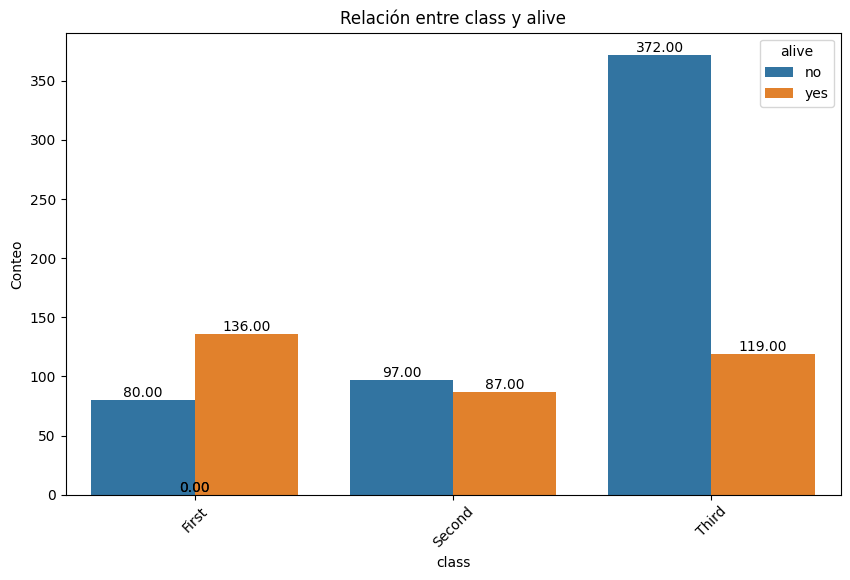

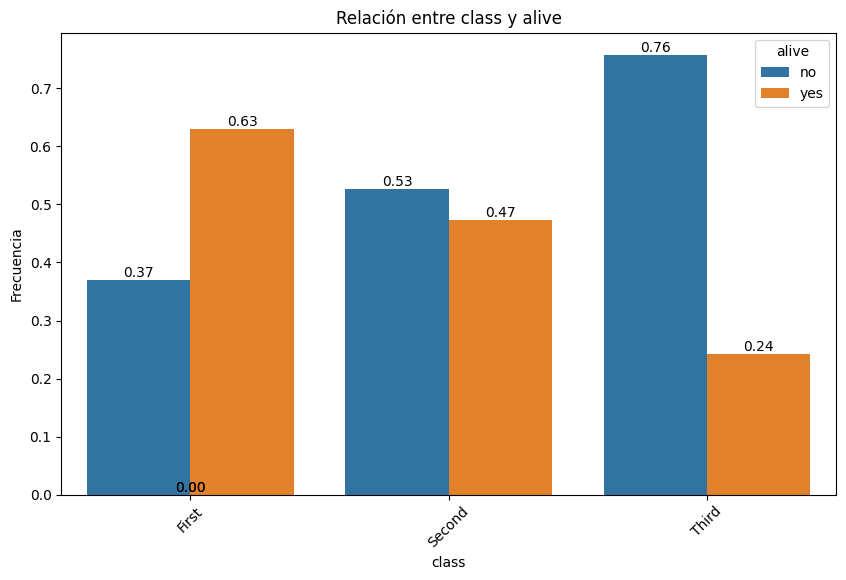

In [77]:
#En términos absolutos y relativos ¿que qué clase sobrevivieron más pasajeros?
plot_categorical_relationship_fin(df_titanic, 'class','alive', relative_freq=False, show_values=True, size_group = 5)
plot_categorical_relationship_fin(df_titanic, 'class','alive', relative_freq=True, show_values=True, size_group = 5)

In [78]:
#¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

#1: Tabla de contingencia¡
tabla_contingencia_class = pd.crosstab(df_titanic['alive'], df_titanic['class'])

#2: Test Chi Cuadrado¡
from scipy.stats import chi2_contingency

chi2_class, p_class, dof_class, expected_class = chi2_contingency(tabla_contingencia_class)


print("Valor Chi-Cuadrado:", chi2_class)
print("P-Value:", p_class)
print("Grados de Libertad:", dof_class)
print("Tabla de Frecuencias Esperadas:\n", expected_class)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


#### Existe significación estadística entre la clase y la supervivencia porque `P-Value: 4.549251711298793e-23`

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

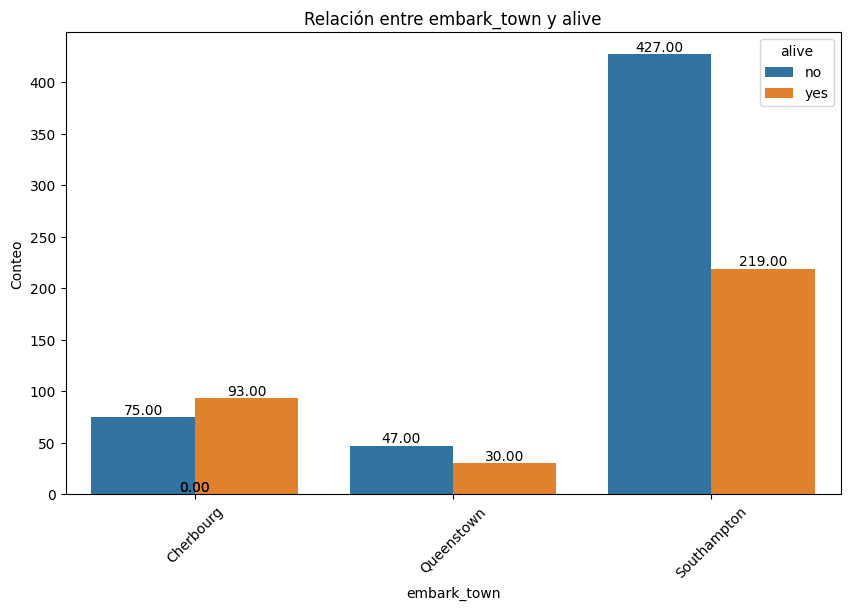

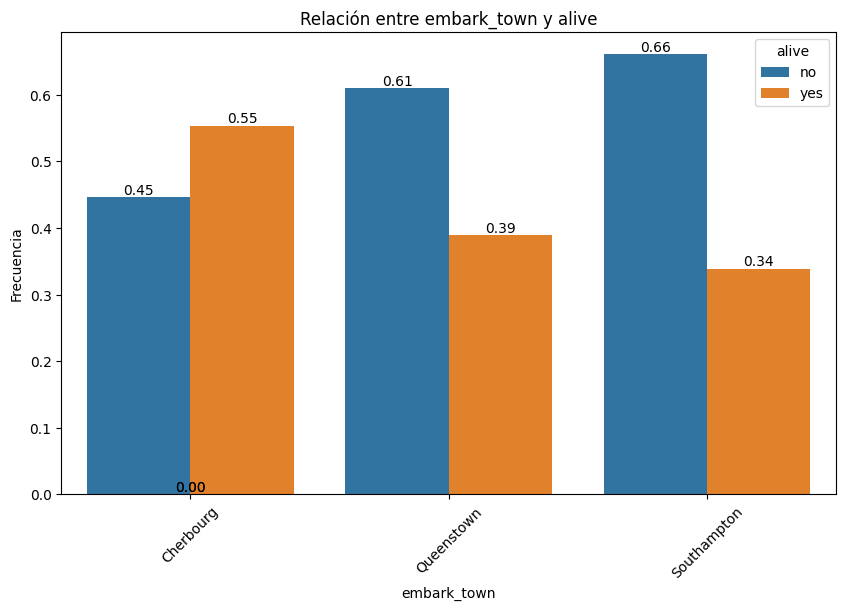

In [79]:
#¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas?
plot_categorical_relationship_fin(df_titanic, 'embark_town','alive', relative_freq=False, show_values=True, size_group = 5)
plot_categorical_relationship_fin(df_titanic, 'embark_town','alive', relative_freq=True, show_values=True, size_group = 5)

In [80]:
#¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

#1: Tabla de contingencia
tabla_contingencia_town = pd.crosstab(df_titanic['alive'], df_titanic['embark_town'])

#2: Test Chi Cuadrado
from scipy.stats import chi2_contingency

chi2_town, p_town, dof_town, expected_town = chi2_contingency(tabla_contingencia_town)


print("Valor Chi-Cuadrado:", chi2_town)
print("P-Value:", p_town)
print("Grados de Libertad:", dof_town)
print("Tabla de Frecuencias Esperadas:\n", expected_town)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


#### Existe significación estadística entre la ciudad y la supervivencia porque `P-Value: 2.3008626481449577e-06`

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

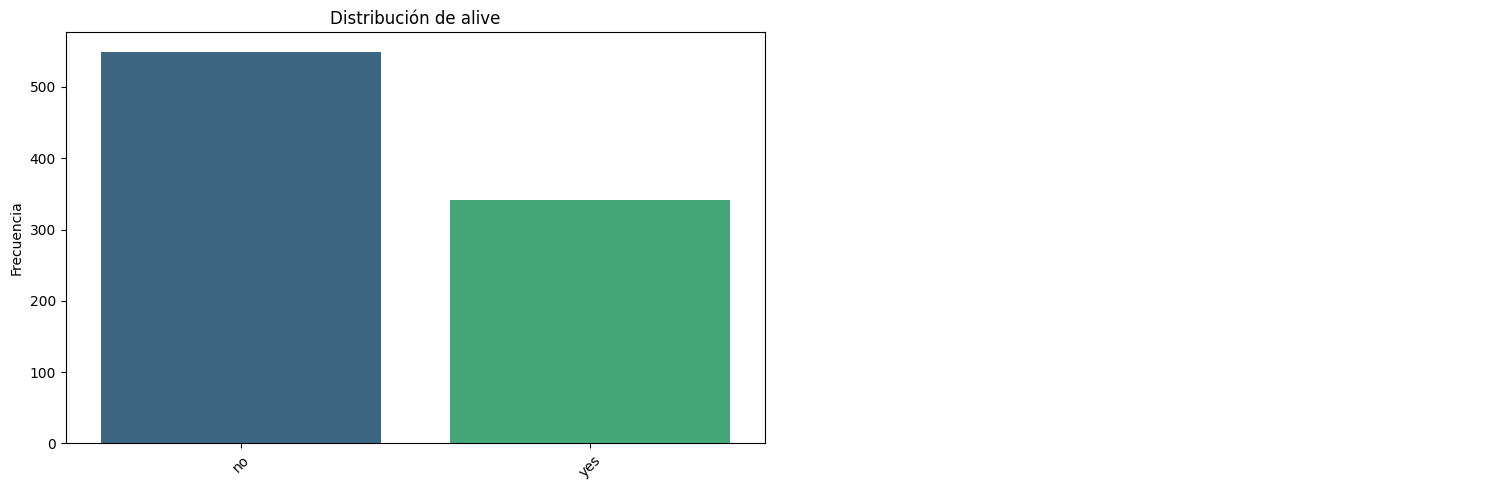

(2,)


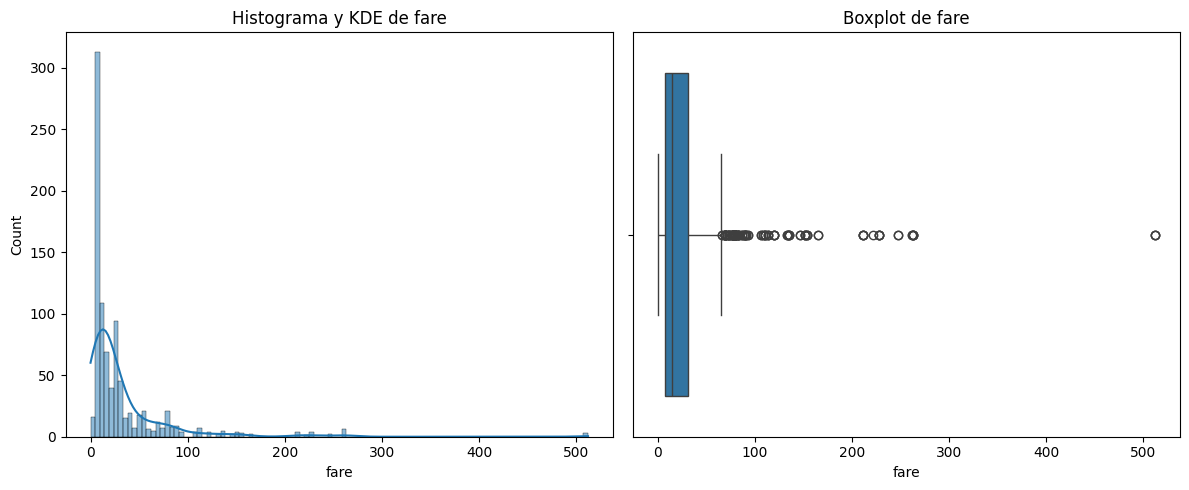

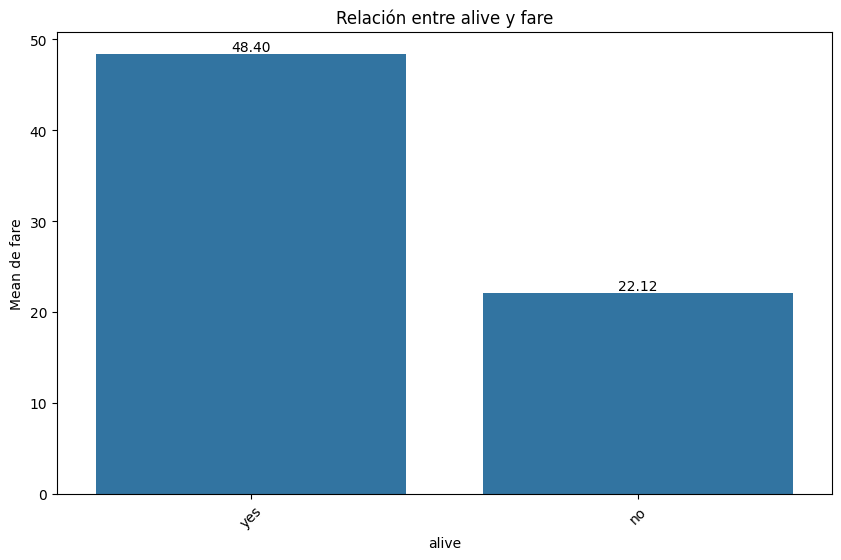

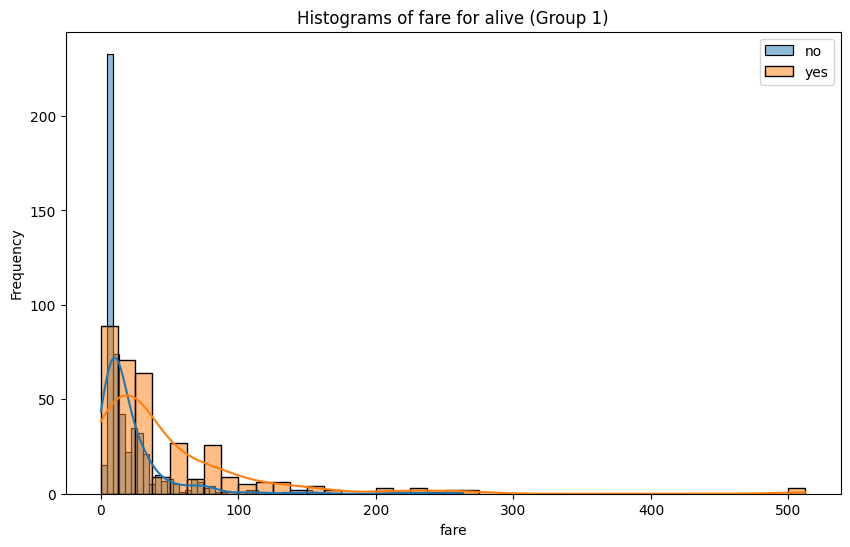

Valor F: 63.03076422804448
Valor p: 6.120189341921873e-15


In [109]:
pinta_distribucion_categoricas(df_titanic, ['alive'])

plot_combined_graphs(df_titanic, ['fare'], whisker_width=1.5)

#Los que se salvaron, habían pagado de media el doble por su pasaje
plot_categorical_numerical_relationship (df_titanic, 'alive', 'fare', show_values=True, measure = 'mean')

#A partir de un cierto coste del pasaje (unos 25), hay más supervivientes que fallecidos y así se mantiene
plot_grouped_histograms(df_titanic, 'alive', 'fare', group_size=3)


#Anova
from scipy import stats

grupos = df_titanic['alive'].unique() 
tarifa_por_segmento = [df_titanic[df_titanic['alive'] == grupo]['fare'] for grupo in grupos]
tarifa_por_segmento


f_val, p_val = stats.f_oneway(*tarifa_por_segmento) # El método * (igual que cuando vimos *args hace mil años) 
                                                    # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)

#### Según el test Anova, existe correlación entre supervivencia y tarifa pagada, ya que `Valor p: 6.120189341921873e-15`

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
is_child              False
is_adult               True
Name: 258, dtype: object


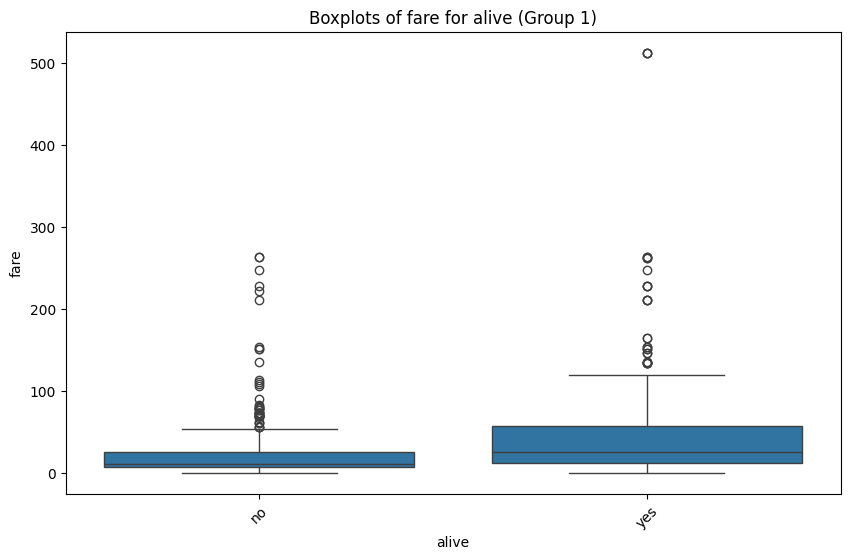

In [112]:
#¿Qué ocurrió con la persona que más dinero se dejó?
max_fare = df_titanic['fare'].idxmax()
print(df_titanic.loc[max_fare])

plot_grouped_boxplots(df_titanic, 'alive', 'fare')

#### La persona que más pagó(532) se salvó. Era una mujer de 35 años que se subió en Cherburgo y viajaba sola en primera clase.

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

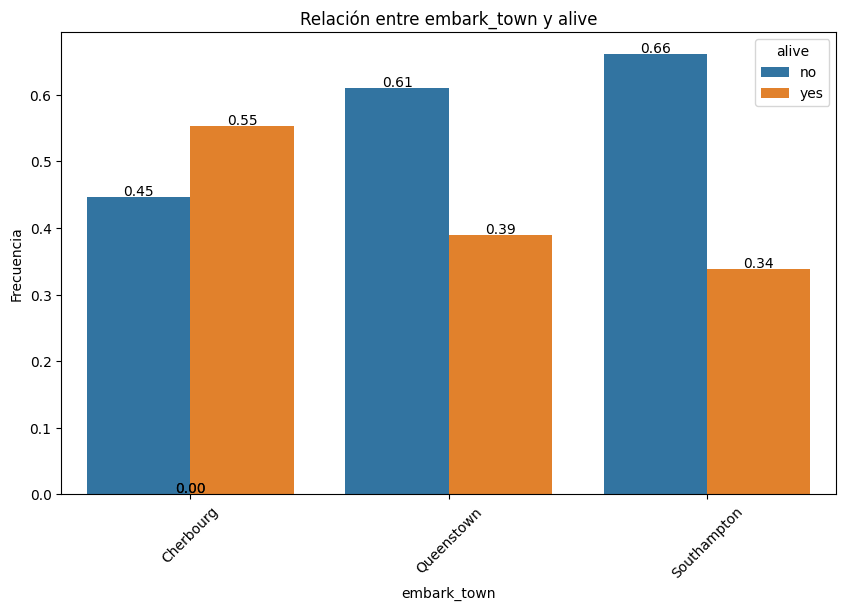

Respuesta no:


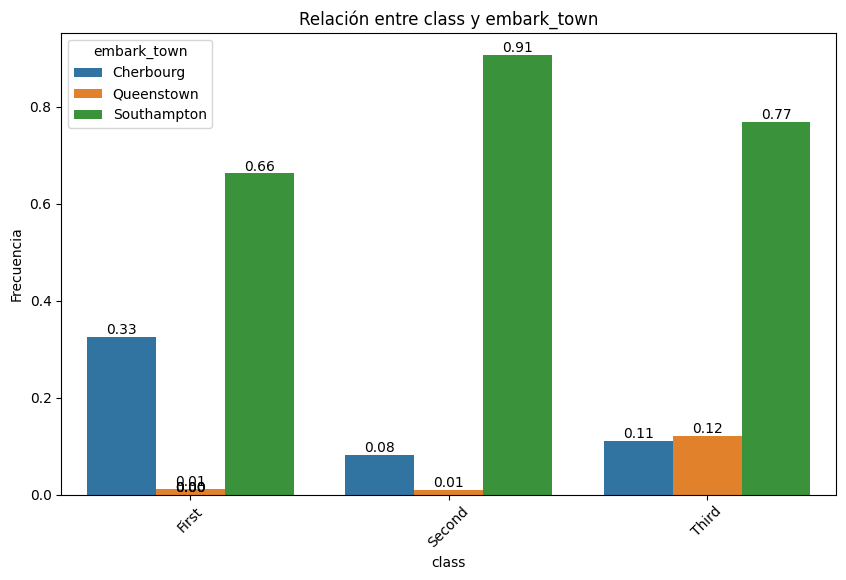

Respuesta yes:


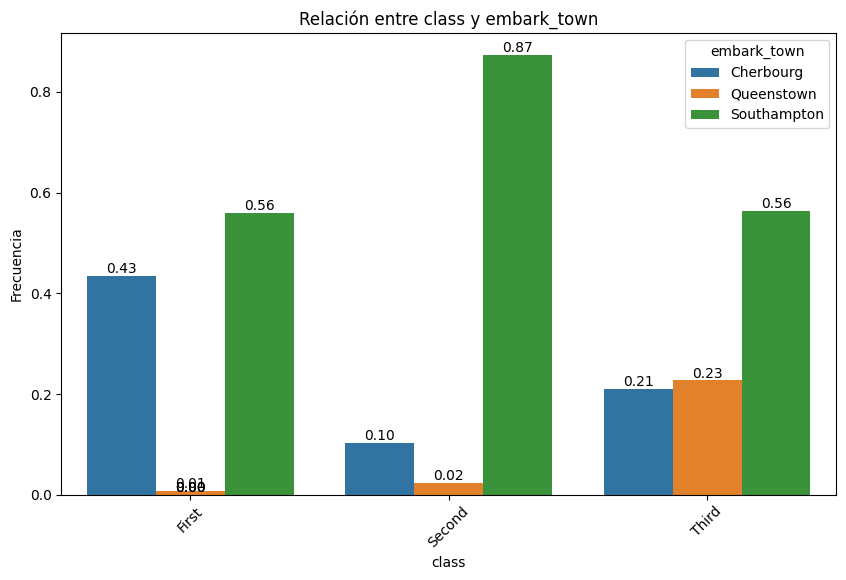

In [133]:
plot_categorical_relationship_fin(df_titanic, 'embark_town', 'alive', relative_freq=True, show_values=True, size_group = 4)

#
columnas = ['alive', 'embark_town', 'class'] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]

diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.